<a href="https://colab.research.google.com/github/marabaso/ie423/blob/main/task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Initialize

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

## Load Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/bankmarketing/bank-full.csv')

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Analyze Data

In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [11]:
df.describe(include=['object'])

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [15]:
cat_variables = df.select_dtypes(include=['object']).columns
for var in cat_variables:
  print(df[var].value_counts())
  print()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

default
no     44396
yes      815
Name: count, dtype: int64

housing
yes    25130
no     20081
Name: count, dtype: int64

loan
no     37967
yes     7244
Name: count, dtype: int64

contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64

poutcome
unknown    36959
failure     4901

In our data, the response variable does not seem to be evenly distributed. the ratio is 1:8 (yes:no).

In [7]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

No missing data.

<Axes: xlabel='age', ylabel='balance'>

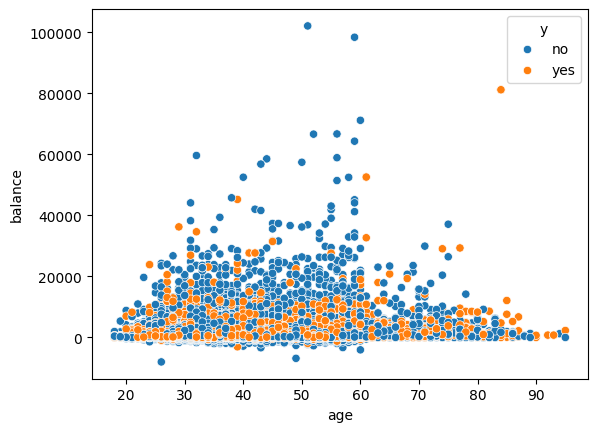

In [17]:
import seaborn as sns
sns.scatterplot(x=df['age'], y=df['balance'], hue=df['y'])

Below 20,000 balance, there does not seem to be visibly clear relation with our target value. Over 20,000 balance, it seems that customers are more likely to subscribe a term deposit. Age seem to be correlated with balance as customer gets older their balance gets lower. But the relation of age with y is hard to observe.

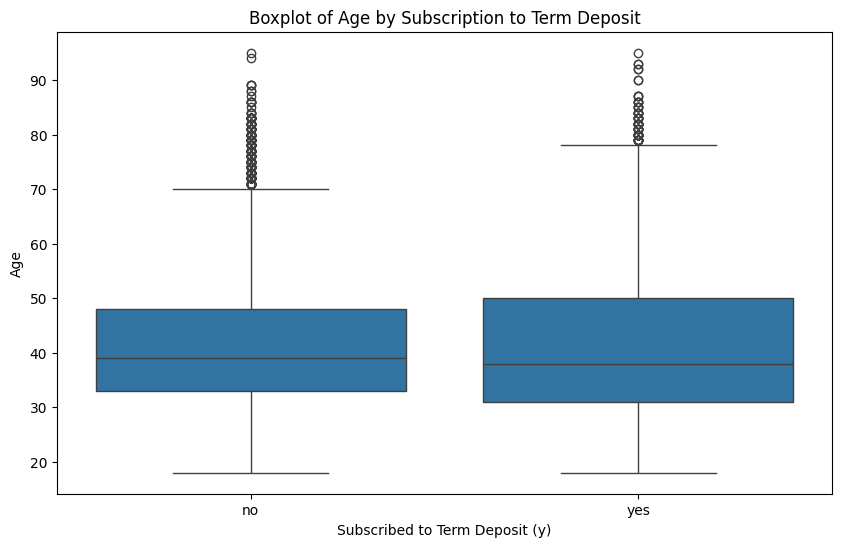

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='age', data=df)
plt.title('Boxplot of Age by Subscription to Term Deposit')
plt.xlabel('Subscribed to Term Deposit (y)')
plt.ylabel('Age')
plt.show()

Let's check whether marital seem to influence y.

In [22]:
marital_y_crosstab = pd.crosstab(df['marital'], df['y'])
marital_y_crosstab['proportion_yes'] = marital_y_crosstab['yes'] / (marital_y_crosstab['yes'] + marital_y_crosstab['no'])

print(marital_y_crosstab)

y            no   yes  proportion_yes
marital                              
divorced   4585   622        0.119455
married   24459  2755        0.101235
single    10878  1912        0.149492


Maybe single people are slighlty more tentative to subscribe to term deposit.

Let's do it for other categorical variables with more than two unique inputs

In [27]:
def crosstab_with_proportion(df, column):
    crosstab = pd.crosstab(df[column], df['y'], dropna=False)
    crosstab['proportion_yes'] = crosstab['yes'] / (crosstab['no'] + crosstab['yes'])
    return crosstab

# Calculate crosstabs with proportions for education, poutcome, contact, and job
edu_y_crosstab = crosstab_with_proportion(df, 'education')
poutcome_y_crosstab = crosstab_with_proportion(df, 'poutcome')
contact_y_crosstab = crosstab_with_proportion(df, 'contact')
job_y_crosstab = crosstab_with_proportion(df, 'job')

# Print results
print("Education Crosstab with Proportions:\n", edu_y_crosstab, "\n")
print("Poutcome Crosstab with Proportions:\n", poutcome_y_crosstab, "\n")
print("Contact Crosstab with Proportions:\n", contact_y_crosstab, "\n")
print("Job Crosstab with Proportions:\n", job_y_crosstab, "\n")

Education Crosstab with Proportions:
 y             no   yes  proportion_yes
education                             
primary     6260   591        0.086265
secondary  20752  2450        0.105594
tertiary   11305  1996        0.150064
unknown     1605   252        0.135703 

Poutcome Crosstab with Proportions:
 y            no   yes  proportion_yes
poutcome                             
failure    4283   618        0.126097
other      1533   307        0.166848
success     533   978        0.647253
unknown   33573  3386        0.091615 

Contact Crosstab with Proportions:
 y             no   yes  proportion_yes
contact                               
cellular   24916  4369        0.149189
telephone   2516   390        0.134205
unknown    12490   530        0.040707 

Job Crosstab with Proportions:
 y                no   yes  proportion_yes
job                                      
admin.         4540   631        0.122027
blue-collar    9024   708        0.072750
entrepreneur   1364   123 

Encoding those varibles with enumerating may cause loss of information and the model we built may be unstable. So lets continue with one hot encoder.

## Predict Whether Customer Subscribe to Term Deposit

### Logistic Regression

#### Encoding categorical variables

We encode some variables with particular order and some variables with one hot encoder.

In [25]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


In [33]:
df['y'] = df['y'].map({'no': 0, 'yes': 1})
df2 = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'], drop_first=True)
df2

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,False,False,...,False,False,False,True,False,False,False,False,False,True
1,44,29,5,151,1,-1,0,0,False,False,...,False,False,False,True,False,False,False,False,False,True
2,33,2,5,76,1,-1,0,0,False,True,...,False,False,False,True,False,False,False,False,False,True
3,47,1506,5,92,1,-1,0,0,True,False,...,False,False,False,True,False,False,False,False,False,True
4,33,1,5,198,1,-1,0,0,False,False,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,1,False,False,...,False,False,False,False,True,False,False,False,False,True
45207,71,1729,17,456,2,-1,0,1,False,False,...,False,False,False,False,True,False,False,False,False,True
45208,72,5715,17,1127,5,184,3,1,False,False,...,False,False,False,False,True,False,False,False,True,False
45209,57,668,17,508,4,-1,0,0,True,False,...,False,False,False,False,True,False,False,False,False,True


In logistic regression, we take the output of the linear function and squash the value within the range of [0,1] using the sigmoid function( logistic function). The Sigmoid-Function is an S-shaped curve that can take any real-valued number and map it into a value between the range of 0 and 1, but never exactly at those limits. Typically, if the squashed value is greater than a threshold value we assign it a label 1, else we assign it a label 0.

In [35]:
# Scale data to eliminate the effect of feature units (especially for gradient descent cases)
from sklearn.preprocessing import scale
y = df2['y']
X = scale(df2.drop(['y'], axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8, test_size=0.2,random_state=1)

In [36]:
# Build Logistic Regression model
from sklearn.linear_model import LogisticRegression


model_lr = LogisticRegression(random_state=1)
model_lr.fit(X_train, y_train)
y_test_pred = model_lr.predict(X_test)

Since target is binary and not continuous, we cannot directly compare the prediction with the actual.  So, let's view the model result in a table - also known as a **Confusion Matrix**.

In [37]:
# Display model results using
from sklearn.metrics import confusion_matrix

print ('Confusion Matrix:')
print (confusion_matrix(y_test, y_test_pred))

Confusion Matrix:
[[7786  207]
 [ 704  346]]


## Metric 1: F1-score
The F1-score is simply the harmonic mean of the precision and recall

In [38]:
# Display performance results
from sklearn.metrics import classification_report

print ('Classification Report (Logistic Regression):')
print (classification_report(y_test, y_test_pred))

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7993
           1       0.63      0.33      0.43      1050

    accuracy                           0.90      9043
   macro avg       0.77      0.65      0.69      9043
weighted avg       0.88      0.90      0.89      9043



## Metric 2: ROC AUC Score

An **ROC (Receiver Operating Characteristic) curve** plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. The following figure shows a typical ROC curve.

In [39]:
# Display summary results
from sklearn.metrics import roc_auc_score

print ('AUC Score (Logistic Regression):')
print (roc_auc_score(y_test, y_test_pred))

AUC Score (Logistic Regression):
0.6518130745354567


Now that we have one working model with acceptable results, let's see if we can improve it by trying out some other models...

### Naive Bayes
This is a different way of getting to a similar outcome. Naive Bayes is a probabilistic model that uses Bayes Theorem to predict probability of target value given features based on the probability of features given the target.

#### Naive Bayes - Gaussian
Since the pairplot showed normally distributed features (along the diagonal), the Gaussian Naive Bayes would be a good model to try...

In [40]:
# Build Naive Bayes - Gaussian model
from sklearn.naive_bayes import GaussianNB

model_gnb = GaussianNB()
model_gnb.fit(X_train,y_train)
y_test_pred = model_gnb.predict(X_test)

print ('Results (Naive Bayes - Gaussian):\n')

print ('Classification Report:')
print (classification_report(y_test, y_test_pred))

print ('AUC Score:')
print (roc_auc_score(y_test, y_test_pred))

Results (Naive Bayes - Gaussian):

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      7993
           1       0.42      0.48      0.45      1050

    accuracy                           0.86      9043
   macro avg       0.68      0.70      0.68      9043
weighted avg       0.87      0.86      0.87      9043

AUC Score:
0.6965244589015389


### K-Nearest Neighbor (KNN)
This is yet another way of getting to a similar outcome, but this time using cartesian distances to determine how close or far a new data point is to the previous data points.

In [41]:
# Build KNN model with 5 nearest neighbors
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=10)
model_knn.fit(X_train, y_train)
y_test_pred = model_knn.predict(X_test)

print ('AUC Score (K-Nearest Neighbor):')
print (roc_auc_score(y_test, y_test_pred))

AUC Score (K-Nearest Neighbor):
0.6136615967543029


Let's try a different type of classification model before we wrap up...

### Support Vector Machines
While Logistic Regression and Naive Bayes are probabilistic models, Support Vector Machines try to create a boundary that maximize the margin between the different classes.

In [43]:
# Build Support Vector Machines - Classifier model

from sklearn.svm import SVC

model_svm = SVC()
model_svm.fit(X_train, y_train)
y_test_pred = model_svm.predict(X_test)

print ('Results (Support Vector Classifier):\n')

print ('Classification Report:')
print (classification_report(y_test, y_test_pred))

print ('AUC Score:')
print (roc_auc_score(y_test, y_test_pred))

Results (Support Vector Classifier):

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7993
           1       0.66      0.33      0.44      1050

    accuracy                           0.90      9043
   macro avg       0.79      0.66      0.70      9043
weighted avg       0.89      0.90      0.89      9043

AUC Score:
0.6554693690312356


Naive-Bayes seems to perform best with highest AUC score of 0.69.